In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load Excel file
excel_file_path = "EnergyCosumptionGeneration.xlsx"

In [3]:
# Dictionary where keys are sheet names and values are the number of rows to read
num_rows_dict = {
    "Primary_Energy_Consumption": 58,  # Specify the number of rows for Primary_Energy_Consumption
    "Electricity_Generation": 38,     # Read all rows for Electricity_Generation
    "Renewables_Generation_By_Source": None  # Read all rows for Renewables_Generation_By_Source
}

# Read all sheets into a dictionary
all_sheets = pd.read_excel(excel_file_path, sheet_name=None)

# Access individual sheets using their names and process them
EC_df = all_sheets["Primary_Energy_Consumption"].head(num_rows_dict["Primary_Energy_Consumption"])
EG_df = all_sheets["Electricity_Generation"].head(num_rows_dict["Electricity_Generation"])
RGS_df = all_sheets["Renewables_Generation_By_Source"]

## Primary Energy Consumption Analysis 

In [4]:
print(EC_df.head())

   Year       Canada      Mexico            US  Total North America  \
0  1965  1389.036200  293.325216  14439.701170         16122.062586   
1  1966  1478.791113  310.583141  15247.363624         17036.737879   
2  1967  1546.291549  316.549447  15778.539545         17641.380541   
3  1968  1645.590204  344.764634  16719.385477         18709.740315   
4  1969  1745.347860  378.427330  17583.423303         19707.198493   

    Argentina      Brazil      Chile    Colombia    Ecuador  ...  Sri Lanka  \
0  328.527628  273.869628  72.432833   97.673374   8.656928  ...  10.453816   
1  339.174765  298.780141  77.675185  109.927236   9.112492  ...  10.781163   
2  349.032256  309.579095  79.188280  115.861042   9.859640  ...  11.046680   
3  360.844443  353.486029  78.858902  120.285316  11.642035  ...  11.483015   
4  372.910680  385.811996  84.996406  121.782538  12.369395  ...  11.926895   

      Taiwan   Thailand    Vietnam  Other Asia Pacific  Total Asia Pacific  \
0  70.357673  30.706

## Data Cleaning and Preprocessing

In [5]:
# Display data types for all columns in the DataFrames
print("Data Types for Primary_Energy_Consumption:")

EC_types = EC_df.dtypes

for column, dtypes in EC_types.items():
    print(f"{column}: {dtypes}")

Data Types for Primary_Energy_Consumption:
Year: object
Canada: float64
Mexico: float64
US: float64
Total North America: float64
Argentina: float64
Brazil: float64
Chile: float64
Colombia: float64
Ecuador: float64
Peru: float64
Trinidad & Tobago: float64
Venezuela: float64
Central America: float64
Other Caribbean: float64
Other South America: float64
Total S. & Cent. America: float64
Austria: float64
Belgium: float64
Bulgaria: float64
Croatia: float64
Cyprus: float64
Czech Republic: float64
Denmark: float64
Estonia: float64
Finland: float64
France: float64
Germany: float64
Greece: float64
Hungary: float64
Iceland: float64
Ireland: float64
Italy: float64
Latvia: float64
Lithuania: float64
Luxembourg: float64
Netherlands: float64
North Macedonia: float64
Norway: float64
Poland: float64
Portugal: float64
Romania: float64
Slovakia: float64
Slovenia: float64
Spain: float64
Sweden: float64
Switzerland: float64
Turkey: float64
Ukraine: float64
United Kingdom: float64
Other Europe: float64
Tot

In [6]:
# Convert the "Year" column to integer data type in EC_df
EC_df["Year"] = EC_df["Year"].astype(int)

C:\Users\mnand\AppData\Local\Temp\ipykernel_20740\3430955451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EC_df["Year"] = EC_df["Year"].astype(int)


In [7]:
EC_df.dtypes["Year"]

dtype('int32')

In [8]:
# Check missing value count for each column
missing_value_count = EC_df.isnull().sum()

print("Missing Value Count for", "Primary_Energy_Consumption")

for column, count in missing_value_count.items():
    if count > 0:
        print(f"{column}: {count}")

Missing Value Count for Primary_Energy_Consumption


In [9]:
# Check for null values
null_values = EC_df.isnull().sum()

print("Null Values for", "Primary_Energy_Consumption")
for column, count in null_values.items():
    if count > 0:
        print(f"{column}: {count}")

Null Values for Primary_Energy_Consumption


In [10]:
# Check for zero values in the DataFrame
zero_values = EC_df[EC_df == 0].count()

# Display the count of zero values for each column
print("Count of Zero Values:")
for column, count in zero_values.items():
    if count > 0:
        print(f"{column}: {count}")

Count of Zero Values:
Croatia: 25
Estonia: 20
Latvia: 20
Lithuania: 20
North Macedonia: 25
Slovenia: 25
Ukraine: 20
Azerbaijan: 20
Belarus: 20
Kazakhstan: 20
Russian Federation: 20
Turkmenistan: 20
USSR: 38
Uzbekistan: 20
Other CIS: 20
Bangladesh: 6


In [11]:
# Calculate the mean for columns from the 2nd to the 59th column
column_means = EC_df.iloc[:, 1:59].mean()

# Print the mean values for each column
print(column_means)

Canada                       3116.903481
Mexico                       1394.734580
US                          22892.810431
Total North America         27404.448492
Argentina                     638.704974
Brazil                       1939.164516
Chile                         238.578186
Colombia                      304.981193
Ecuador                        95.047079
Peru                          153.449759
Trinidad & Tobago             114.020560
Venezuela                     617.427042
Central America               184.585316
Other Caribbean               385.029014
Other South America           194.441058
Total S. & Cent. America     4865.428696
Austria                       345.145880
Belgium                       632.219301
Bulgaria                      248.695115
Croatia                        55.311399
Cyprus                         21.399282
Czech Republic                529.982453
Denmark                       219.878398
Estonia                        50.001477
Finland         

In [12]:
# Replace zero values with the column means
EC_df = EC_df.replace(0, column_means)

In [13]:
# Check for zero values in the DataFrame
zero_values = EC_df[EC_df == 0].count()

# Display the count of zero values for each column
print("Count of Zero Values:")
for column, count in zero_values.items():
    if count > 0:
        print(f"{column}: {count}")

Count of Zero Values:
Other CIS: 20
Bangladesh: 6


In [14]:
# Calculate the mean for the specific columns
mean_other_cis = EC_df["Other CIS"].mean()
mean_bangladesh = EC_df["Bangladesh"].mean()

# Replace zero values with the mean for the specific columns
EC_df.loc[EC_df["Other CIS"] == 0, "Other CIS"] = mean_other_cis
EC_df.loc[EC_df["Bangladesh"] == 0, "Bangladesh"] = mean_bangladesh

# Display the updated DataFrame
#print(EC_df)

In [15]:
# Check for zero values in the DataFrame
zero_values = EC_df[EC_df == 0].count()

# Display the count of zero values for each column
print("Count of Zero Values:")
for column, count in zero_values.items():
    if count > 0:
        print(f"{column}: {count}")

Count of Zero Values:


In [16]:
# Save preprocessed Energy Consumption DataFrame to CSV
EC_df.to_csv("Cleaned_energy_consumption.csv", index=False)

## Exploratory Data Analysis

In [17]:
# Display the first few rows of the dataset
print(EC_df.head())

   Year       Canada      Mexico            US  Total North America  \
0  1965  1389.036200  293.325216  14439.701170         16122.062586   
1  1966  1478.791113  310.583141  15247.363624         17036.737879   
2  1967  1546.291549  316.549447  15778.539545         17641.380541   
3  1968  1645.590204  344.764634  16719.385477         18709.740315   
4  1969  1745.347860  378.427330  17583.423303         19707.198493   

    Argentina      Brazil      Chile    Colombia    Ecuador  ...  Sri Lanka  \
0  328.527628  273.869628  72.432833   97.673374   8.656928  ...  10.453816   
1  339.174765  298.780141  77.675185  109.927236   9.112492  ...  10.781163   
2  349.032256  309.579095  79.188280  115.861042   9.859640  ...  11.046680   
3  360.844443  353.486029  78.858902  120.285316  11.642035  ...  11.483015   
4  372.910680  385.811996  84.996406  121.782538  12.369395  ...  11.926895   

      Taiwan   Thailand    Vietnam  Other Asia Pacific  Total Asia Pacific  \
0  70.357673  30.706

In [18]:
# Get information about the dataset (data types, non-null counts)
print(EC_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Columns: 104 entries, Year to European Union
dtypes: float64(103), int32(1)
memory usage: 47.0 KB
None


In [19]:
# Summary statistics
print(EC_df.describe())

              Year       Canada       Mexico            US  \
count    58.000000    58.000000    58.000000     58.000000   
mean   1993.500000  3116.903481  1394.734580  22892.810431   
std      16.886879   779.274234   672.291012   3460.497586   
min    1965.000000  1389.036200   293.325216  14439.701170   
25%    1979.250000  2603.885756   850.611590  20261.715841   
50%    1993.500000  3240.581243  1412.361593  23605.205843   
75%    2007.750000  3787.929364  2067.391483  25936.965196   
max    2022.000000  4076.074053  2423.749480  27063.786683   

       Total North America    Argentina       Brazil       Chile    Colombia  \
count            58.000000    58.000000    58.000000   58.000000   58.000000   
mean          27404.448492   638.704974  1939.164516  238.578186  304.981193   
std            4854.229010   220.845280  1081.375173  141.091989  142.197024   
min           16122.062586   328.527628   273.869628   72.432833   97.673374   
25%           23897.628261   460.100822  

In [20]:
# Correlation matrix
correlation_matrix = EC_df.corr()
print(correlation_matrix)

                         Year    Canada    Mexico        US  \
Year                 1.000000  0.964400  0.989724  0.913589   
Canada               0.964400  1.000000  0.973061  0.968231   
Mexico               0.989724  0.973061  1.000000  0.921500   
US                   0.913589  0.968231  0.921500  1.000000   
Total North America  0.943175  0.985536  0.951628  0.995942   
...                       ...       ...       ...       ...   
Total Asia Pacific   0.964756  0.874156  0.940185  0.811618   
Total World          0.993538  0.947797  0.981147  0.892118   
OECD                 0.935039  0.987652  0.948441  0.992333   
Non-OECD             0.969372  0.886839  0.947351  0.809895   
European Union       0.734891  0.876174  0.771712  0.882962   

                     Total North America  Argentina    Brazil     Chile  \
Year                            0.943175   0.977387  0.993686  0.971206   
Canada                          0.985536   0.927559  0.954199  0.904182   
Mexico            

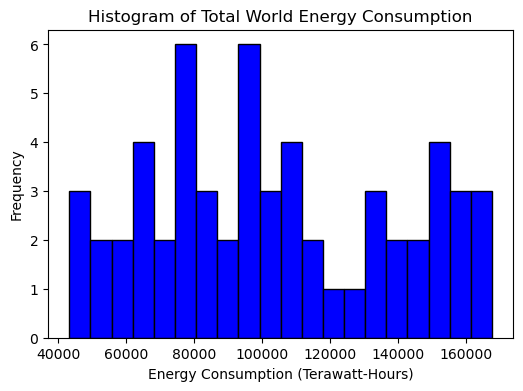

In [21]:
# Histogram of energy consumption values
plt.figure(figsize=(6, 4))
plt.hist(EC_df["Total World"], bins=20, color="blue", edgecolor="black")
plt.title("Histogram of Total World Energy Consumption")
plt.xlabel("Energy Consumption (Terawatt-Hours)")
plt.ylabel("Frequency")
plt.show()

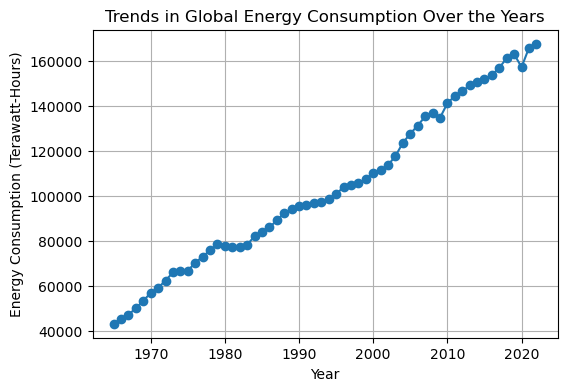

In [22]:
# Visualize trends in global energy consumption over the years using a line chart
plt.figure(figsize=(6, 4))
plt.plot(EC_df["Year"], EC_df["Total World"], marker='o')
plt.title("Trends in Global Energy Consumption Over the Years")
plt.xlabel("Year")
plt.ylabel("Energy Consumption (Terawatt-Hours)")
plt.grid(True)
plt.show()

In [23]:
# Select a subset of columns for visualization
columns_subset = ["US", "China", "India", "Canada"]  # Replace with desired columns

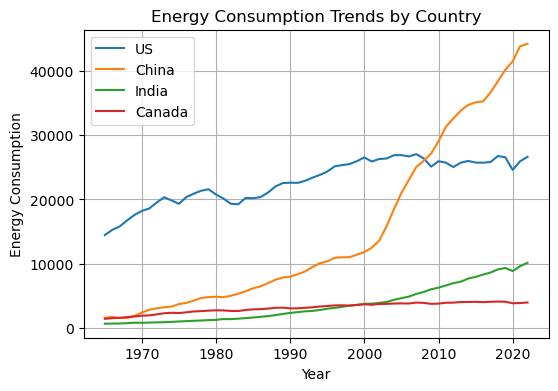

In [24]:
# Line Chart: Energy Consumption Trends by Year for Selected Columns
plt.figure(figsize=(6, 4))
for column in columns_subset:
    plt.plot(EC_df["Year"], EC_df[column], label=column)
plt.title("Energy Consumption Trends by Country")
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.legend()
plt.grid(True)
plt.show()

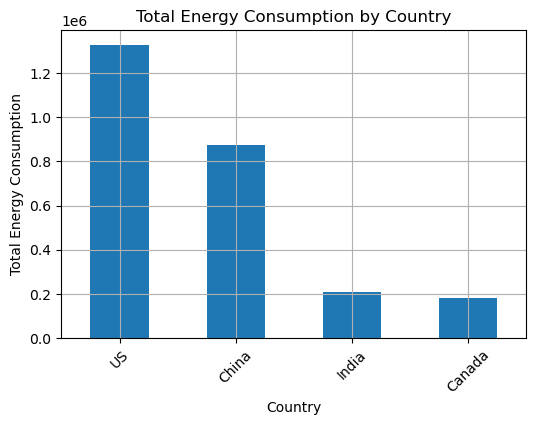

In [25]:
# Bar Plot: Total Energy Consumption by Region
total_consumption = EC_df[columns_subset].sum()
plt.figure(figsize=(6, 4))
total_consumption.plot(kind="bar")
plt.title("Total Energy Consumption by Country")
plt.xlabel("Country")
plt.ylabel("Total Energy Consumption")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

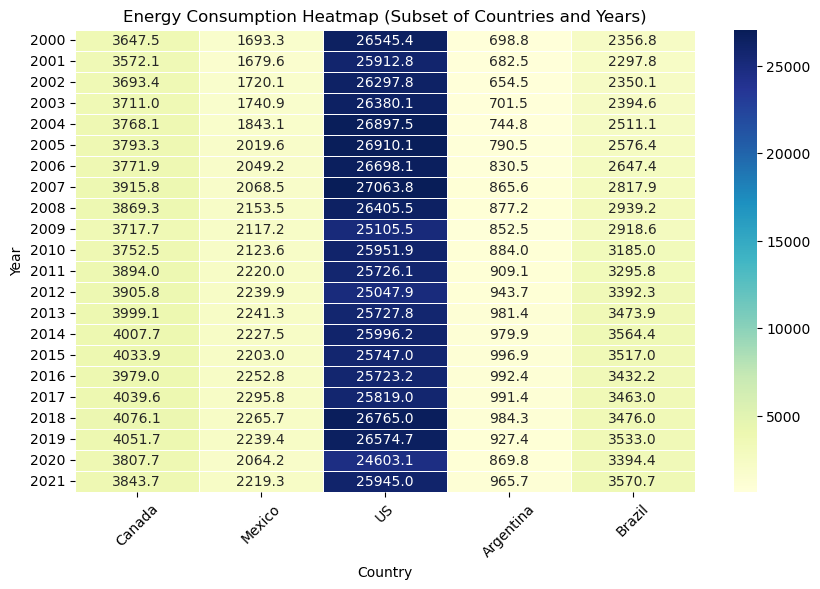

In [26]:
# Set the "Year" column as the index
EC_df.set_index("Year", inplace=True)

# Select a subset of countries and a range of years
countries_subset = ["Canada", "Mexico", "US", "Argentina", "Brazil"]
years_subset = range(2000, 2022)  # Adjust the range as needed

# Create a subset of the data
subset_data = EC_df.loc[years_subset, countries_subset]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(subset_data, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Energy Consumption Heatmap (Subset of Countries and Years)")
plt.xlabel("Country")
plt.ylabel("Year")
plt.xticks(rotation=45)
plt.show()

## Electricity Generation Analysis

In [27]:
print(EG_df.head())

   Year      Canada      Mexico           US  Total North America  Argentina  \
0  1985  459.016400   96.207532  2657.150071          3212.374003  45.303728   
1  1986  468.584033   99.589895  2676.113155          3244.287083  49.022193   
2  1987  496.397700  106.165401  2772.205266          3374.768367  52.115279   
3  1988  506.015765  112.230823  2914.445815          3532.692403  52.499520   
4  1989  498.092587  120.047161  3155.449679          3773.589427  50.862813   

       Brazil   Chile   Colombia  Ecuador  ...  Sri Lanka     Taiwan  \
0  193.682234  14.040  29.374664    4.558  ...     2.4650  55.556761   
1  202.128899  14.820  31.652930    5.012  ...     2.6517  62.333849   
2  203.331472  15.637  33.680269    5.384  ...     2.7072  69.179059   
3  214.952848  16.915  35.473254    5.641  ...     2.7984  76.261221   
4  221.739021  17.811  37.020806    5.769  ...     2.8579  84.057809   

   Thailand  Vietnam  Other Asia Pacific  Total Asia Pacific   Total World  \
0  23.02

### Data Cleaning and Preprocessing

In [28]:
# Display data types for all columns in the DataFrames
print("Data Types for Electricity_Generation")

EG_types = EG_df.dtypes

for column, dtypes in EG_types.items():
    print(f"{column}: {dtypes}")

Data Types for Electricity_Generation
Year: object
Canada: float64
Mexico: float64
US: float64
Total North America: float64
Argentina: float64
Brazil: float64
Chile: float64
Colombia: float64
Ecuador: float64
Peru: float64
Trinidad & Tobago: float64
Venezuela: float64
Central America: float64
Other Caribbean: float64
Other South America: float64
Total S. & Cent. America: float64
Austria: float64
Belgium: float64
Bulgaria: float64
Croatia: float64
Cyprus: float64
Czech Republic: float64
Denmark: float64
Estonia: float64
Finland: float64
France: float64
Germany: float64
Greece: float64
Hungary: float64
Iceland: float64
Ireland: float64
Italy: float64
Latvia: float64
Lithuania: float64
Luxembourg: float64
Netherlands: float64
North Macedonia: float64
Norway: float64
Poland: float64
Portugal: float64
Romania: float64
Slovakia: float64
Slovenia: float64
Spain: float64
Sweden: float64
Switzerland: float64
Turkey: float64
Ukraine: float64
United Kingdom: float64
Other Europe: float64
Total Eu

In [29]:
# Convert the "Year" column to integer data type in EG_df
EG_df["Year"] = EG_df["Year"].astype(int)

C:\Users\mnand\AppData\Local\Temp\ipykernel_20740\860653404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EG_df["Year"] = EG_df["Year"].astype(int)


In [30]:
EG_df.dtypes["Year"]

dtype('int32')

In [31]:
# Check missing value count for each column
missing_value_count = EG_df.isnull().sum()

print("Missing Value Count for", "Energy_Generation")

for column, count in missing_value_count.items():
    if count > 0:
        print(f"{column}: {count}")

Missing Value Count for Energy_Generation


In [32]:
# Check for null values
null_values = EG_df.isnull().sum()

print("Null Values for", "Primary_Energy_Consumption")
for column, count in null_values.items():
    if count > 0:
        print(f"{column}: {count}")

Null Values for Primary_Energy_Consumption


In [33]:
# Check for zero values in the DataFrame
zero_values = EG_df[EG_df == 0].count()

# Display the count of zero values for each column
print("Count of Zero Values:")
for column, count in zero_values.items():
    if count > 0:
        print(f"{column}: {count}")

Count of Zero Values:
Croatia: 5
North Macedonia: 5
Slovenia: 5


In [34]:
# Columns with zero values to be replaced
columns_to_replace = ["Croatia", "North Macedonia", "Slovenia"]

# Calculate the mean for the specific columns
column_means = EG_df[columns_to_replace].mean()

# Replace zero values with the mean for the specific columns
for column in columns_to_replace:
    EG_df[column] = EG_df[column].replace(0, column_means[column])

# Display the updated DataFrame
#print(EG_df.head())

C:\Users\mnand\AppData\Local\Temp\ipykernel_20740\57654111.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EG_df[column] = EG_df[column].replace(0, column_means[column])


In [35]:
# Check for zero values in the DataFrame
zero_values = EG_df[EG_df == 0].count()

# Display the count of zero values for each column
print("Count of Zero Values:")
for column, count in zero_values.items():
    if count > 0:
        print(f"{column}: {count}")

Count of Zero Values:


In [36]:
# Save preprocessed Electricity Generation DataFrame to CSV
EG_df.to_csv("cleaned_electricity_generation.csv", index=False)

### Exploratory Data Analysis

In [37]:
# Display basic information about the dataset
print(EG_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Columns: 103 entries, Year to European Union
dtypes: float64(102), int32(1)
memory usage: 30.6 KB
None


In [38]:
# Display summary statistics
print(EG_df.describe())

              Year      Canada      Mexico           US  Total North America  \
count    38.000000   38.000000   38.000000    38.000000            38.000000   
mean   2003.500000  589.896340  224.901890  3911.706940          4726.505169   
std      11.113055   62.813324   82.733197   567.595024           705.712563   
min    1985.000000  459.016400   96.207532  2657.150071          3212.374003   
25%    1994.250000  554.258306  147.184746  3485.727360          4187.170412   
50%    2003.500000  601.804031  230.149820  4172.236101          5008.370253   
75%    2012.750000  644.656102  296.937375  4349.618848          5294.330166   
max    2022.000000  669.608512  349.298889  4547.656238          5547.990943   

        Argentina      Brazil      Chile   Colombia    Ecuador  ...  \
count   38.000000   38.000000  38.000000  38.000000  38.000000  ...   
mean    99.425913  406.785987  49.129059  56.395221  15.849311  ...   
std     37.026271  155.007584  24.298643  16.379486   9.112231  ..

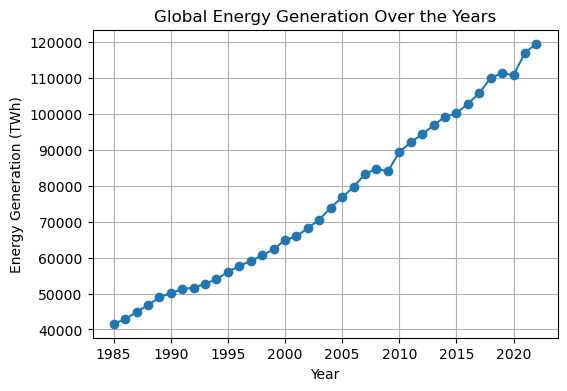

In [39]:
# Calculate global energy consumption for each year
global_consumption_by_year = EG_df.drop(columns='Year').sum(axis=1)

# Visualize global energy consumption trends over the years
plt.figure(figsize=(6, 4))
plt.plot(EG_df['Year'], global_consumption_by_year, marker='o')
plt.title("Global Energy Generation Over the Years")
plt.xlabel("Year")
plt.ylabel("Energy Generation (TWh)")
plt.grid(True)
plt.show()

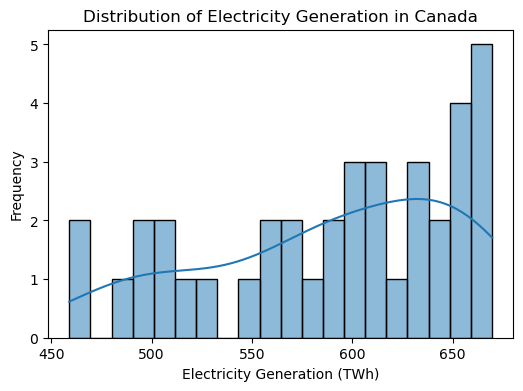

In [40]:
# Visualize the distribution of electricity generation
plt.figure(figsize=(6, 4))
sns.histplot(data=EG_df, x="Canada", bins=20, kde=True)
plt.title("Distribution of Electricity Generation in Canada")
plt.xlabel("Electricity Generation (TWh)")
plt.ylabel("Frequency")
plt.show()

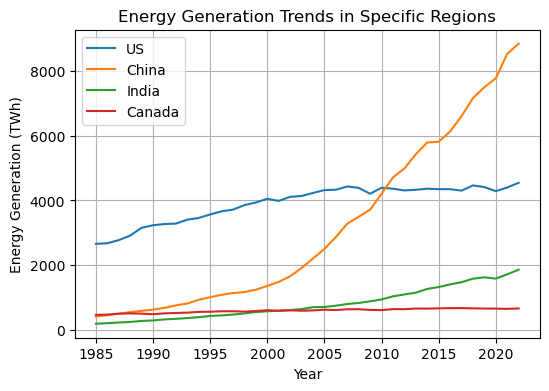

In [41]:
# Line chart: Energy consumption trends in specific regions over the years
plt.figure(figsize=(6, 4))
regions_to_plot = ['US', 'China', 'India', 'Canada']
for region in regions_to_plot:
    plt.plot(EG_df['Year'], EG_df[region], label=region)
plt.title("Energy Generation Trends in Specific Regions")
plt.xlabel("Year")
plt.ylabel("Energy Generation (TWh)")
plt.legend()
plt.grid(True)
plt.show()

<Figure size 400x300 with 0 Axes>

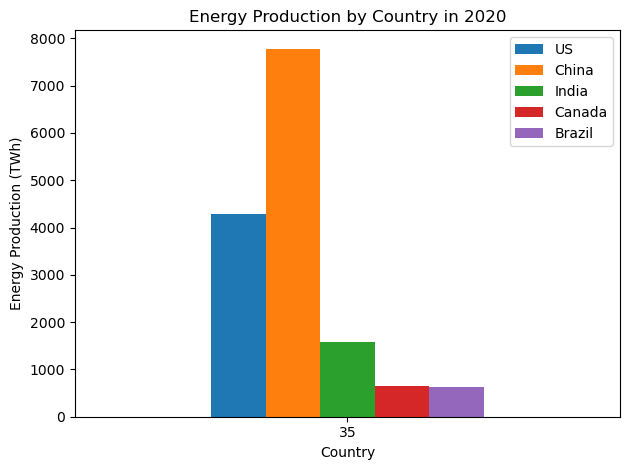

In [42]:
# Choose the specific countries you want to include in the bar plot
countries_to_plot = ['US', 'China', 'India', 'Canada', 'Brazil']

# Filter the DataFrame for the specific countries
countries_data = EG_df.loc[EG_df['Year'] == 2020, countries_to_plot]

plt.figure(figsize=(4, 3))
countries_data.plot(kind='bar')
plt.title("Energy Production by Country in 2020")
plt.xlabel("Country")
plt.ylabel("Energy Production (TWh)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

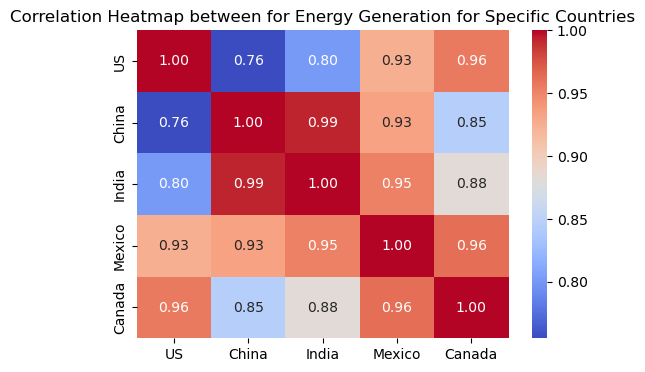

In [43]:
# Choose the specific countries you want to include in the heatmap
countries_to_include = ['US', 'China', 'India', 'Mexico', 'Canada']

# Filter the DataFrame for the specific countries
countries_data = EG_df.loc[:, ['Year'] + countries_to_include]

# Calculate the correlation matrix
correlation_matrix = countries_data.drop(columns='Year').corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap between for Energy Generation for Specific Countries")
plt.show()

# Merge both Consumption and Generation

In [44]:
# Merge the two DataFrames on the "Year" column
merged_df = pd.merge(EC_df, EG_df, on="Year", how="inner")

In [45]:
# Calculate the total primary energy consumption and electricity generation for each year
merged_df["Total Primary Energy Consumption"] = merged_df.iloc[:, 1:].sum(axis=1)
merged_df["Total Electricity Generation"] = merged_df.iloc[:, 24:].sum(axis=1)


In [46]:
# Display the merged DataFrame with calculated columns
print("\nMerged DataFrame:")
print(merged_df.head())


Merged DataFrame:
   Year     Canada_x     Mexico_x          US_x  Total North America_x  \
0  1985  2857.275096  1134.396114  20184.245064           24175.916274   
1  1986  2884.924066  1100.674386  20371.966384           24357.564836   
2  1987  2977.613316  1136.899305  21056.053750           25170.566371   
3  1988  3096.845913  1145.464777  22014.887874           26257.198564   
4  1989  3127.392196  1209.829482  22548.131637           26885.353315   

   Argentina_x     Brazil_x     Chile_x  Colombia_x  Ecuador_x  ...  \
0   481.618983  1371.653041  109.899881  219.453236  60.968281  ...   
1   508.884630  1446.850613  114.165178  229.963349  63.905836  ...   
2   531.837190  1486.949365  119.832711  251.270911  65.865408  ...   
3   540.737901  1532.864205  133.716777  251.092244  76.071248  ...   
4   521.440852  1576.284414  147.822387  264.485242  78.447539  ...   

   Thailand_y  Vietnam_y  Other Asia Pacific_y  Total Asia Pacific_y  \
0    23.02995      5.069             

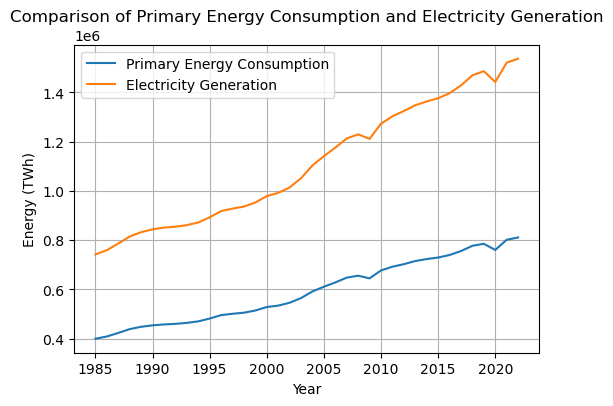

In [47]:
# Compare primary energy consumption and electricity generation
plt.figure(figsize=(6, 4))
plt.plot(merged_df["Year"], merged_df["Total Primary Energy Consumption"], label="Primary Energy Consumption")
plt.plot(merged_df["Year"], merged_df["Total Electricity Generation"], label="Electricity Generation")
plt.title("Comparison of Primary Energy Consumption and Electricity Generation")
plt.xlabel("Year")
plt.ylabel("Energy (TWh)")
plt.legend()
plt.grid(True)
plt.show()

# Renewable Energy Trend Analysis

In [48]:
print(RGS_df.head())

   year      Energy Source     Canada     Mexico          US  \
0  2021               Wind  34.756732  21.074870  382.016944   
1  2021              Solar   5.166626  20.194910  166.082828   
2  2021  Other renewables*   9.862095   5.999511   73.922342   
3  2021              Total  49.785454  47.269291  622.022115   
4  2022               Wind  37.525769  20.317031  439.203686   

   Total North America  Argentina      Brazil      Chile  Colombia  ...  \
0           437.848547  12.937550   72.285975   7.628098  0.060470  ...   
1           191.444365   2.202619   16.752281  10.750199  0.323010  ...   
2            89.783948   2.253668   55.724231   6.573540  2.984199  ...   
3           719.076859  17.393837  144.762486  24.951837  3.367679  ...   
4           497.046486  14.164458   81.631569   9.365620  0.074880  ...   

   Sri Lanka     Taiwan   Thailand    Vietnam  Other Asia Pacific  \
0   0.491672   2.208638   3.532000   2.392465            0.603826   
1   0.885778   7.968746   

In [49]:
# Filter the dataframe to include only the years 2021 and 2022
year_df = RGS_df[(RGS_df["year"] == 2021) | (RGS_df["year"] == 2022)]

# Display the combined and filtered dataframe
print("Combined Energy Data for 2021 and 2022:")
print(year_df)

Combined Energy Data for 2021 and 2022:
   year      Energy Source     Canada     Mexico          US  \
0  2021               Wind  34.756732  21.074870  382.016944   
1  2021              Solar   5.166626  20.194910  166.082828   
2  2021  Other renewables*   9.862095   5.999511   73.922342   
3  2021              Total  49.785454  47.269291  622.022115   
4  2022               Wind  37.525769  20.317031  439.203686   
5  2022              Solar   6.013632  19.273550  206.171717   
6  2022  Other renewables*   8.519960   6.621005   74.168791   
7  2022              Total  52.059361  46.211586  719.544194   

   Total North America  Argentina      Brazil      Chile  Colombia  ...  \
0           437.848547  12.937550   72.285975   7.628098  0.060470  ...   
1           191.444365   2.202619   16.752281  10.750199  0.323010  ...   
2            89.783948   2.253668   55.724231   6.573540  2.984199  ...   
3           719.076859  17.393837  144.762486  24.951837  3.367679  ...   
4       

In [50]:
# Check unique values in the "year" column
print(RGS_df["year"].unique())

# Filter the dataframe to include only the "2022 Growth rate" rows
gr_2022_df = RGS_df[RGS_df["year"].str.strip() == "2022 Growth rate"]

# Display the dataframe containing "2022 Growth rate" rows
print("2022 Growth Rate Data:")
print(gr_2022_df)

[2021 2022 '2022 Growth rate ']
2022 Growth Rate Data:
                 year      Energy Source    Canada    Mexico        US  \
8   2022 Growth rate                Wind  0.079669 -0.035959  0.149697   
9   2022 Growth rate               Solar  0.163938 -0.045623  0.241379   
10  2022 Growth rate   Other renewables* -0.136090  0.103591  0.003334   
11  2022 Growth rate               Total  0.045674 -0.022376  0.156782   

    Total North America  Argentina    Brazil     Chile  Colombia  ...  \
8              0.135202   0.094833  0.129286  0.227779  0.238300  ...   
9              0.209014   0.333731  0.798350  0.344779  0.555958  ...   
10            -0.005281   0.038724 -0.052970 -0.052316 -0.026419  ...   
11             0.137313   0.117815  0.136555  0.204396  0.034193  ...   

    Sri Lanka    Taiwan  Thailand   Vietnam  Other Asia Pacific  \
8    0.000000  0.604130 -0.031651  2.362602           -0.093308   
9    0.144172  0.339651 -0.021970  0.022904            0.110896   
10   0.

In [51]:
gr_2022_df

,year,Energy Source,Canada,Mexico,US,Total North America,Argentina,Brazil,Chile,Colombia,...,Sri Lanka,Taiwan,Thailand,Vietnam,Other Asia Pacific,Total Asia Pacific,Total World,OECD,Non-OECD,European Union
8,2022 Growth rate,Wind,0.079669,-0.035959,0.149697,0.135202,0.094833,0.129286,0.227779,0.238300,...,0.000000,0.604130,-0.031651,2.362602,-0.093308,0.156159,0.135232,0.125111,0.146385,0.088357
9,2022 Growth rate,Solar,0.163938,-0.045623,0.241379,0.209014,0.333731,0.798350,0.344779,0.555958,...,0.144172,0.339651,-0.021970,0.022904,0.110896,0.257477,0.248583,0.208743,0.290740,0.270583
10,2022 Growth rate,Other renewables*,-0.136090,0.103591,0.003334,-0.005281,0.038724,-0.052970,-0.052316,-0.026419,...,0.000000,-0.010740,0.011683,1.283749,-0.001228,0.104388,0.034186,0.015866,0.054991,-0.011561
11,2022 Growth rate,Total,0.045674,-0.022376,0.156782,0.137313,0.117815,0.136555,0.204396,0.034193,...,0.086585,0.329873,-0.002955,0.227524,0.040787,0.181575,0.147285,0.126108,0.170492,0.105082


## Data Cleaning and Preprocessing

In [52]:
# Check for missing values
missing_values = gr_2022_df.isnull().sum()

In [53]:
# Print the results
print("Missing Values:")
#print(missing_values)

for column, count in missing_values.items():
    if count > 0:
        print(f"{column}: {count}")

Missing Values:


In [54]:
# Check for NaN values
nan_values = gr_2022_df.isna().sum()

In [55]:
print("\nNaN Values:")
#print(nan_values)
for column, count in nan_values.items():
    if count > 0:
        print(f"{column}: {count}")


NaN Values:


In [56]:
# Check for special character values
special_character_values = (gr_2022_df == '-').sum()

In [57]:
print("\nSpecial Character Values:")
#print(special_character_values)
for column, count in special_character_values.items():
    if count > 0:
        print(f"{column}: {count}")


Special Character Values:
Trinidad & Tobago: 1
Iceland: 1
Turkmenistan: 2
Uzbekistan: 1
Iraq: 2
Kuwait: 1
Oman: 1
Qatar: 1
Saudi Arabia: 1
Algeria: 1
Egypt: 1
Morocco: 1
Other Northern Africa: 1
Other Southern Africa: 1
Malaysia: 1
Singapore: 1


In [58]:
# List of columns with special character values
columns_with_special_characters = [
    "Trinidad & Tobago",
    "Iceland",
    "Turkmenistan",
    "Uzbekistan",
    "Iraq",
    "Kuwait",
    "Oman",
    "Qatar",
    "Saudi Arabia",
    "Algeria",
    "Egypt",
    "Morocco",
    "Other Northern Africa",
    "Other Southern Africa",
    "Malaysia",
    "Singapore"
]

# Replace special character values with zeros in the specified columns using .loc
for column in columns_with_special_characters:
    gr_2022_df.loc[:, column] = gr_2022_df[column].replace('-', 0)

# Print the modified DataFrame
#print(gr_2022_df)


C:\Users\mnand\AppData\Local\Temp\ipykernel_20740\814647425.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gr_2022_df.loc[:, column] = gr_2022_df[column].replace('-', 0)
C:\Users\mnand\AppData\Local\Temp\ipykernel_20740\814647425.py:23: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  gr_2022_df.loc[:, column] = gr_2022_df[column].replace('-', 0)


In [59]:
# Check for zeros
zero_values = (gr_2022_df == 0).sum()

In [60]:
print("\nZero Values:")
#print(zero_values)
for column, count in zero_values.items():
    if count > 0:
        print(f"{column}: {count}")


Zero Values:
Trinidad & Tobago: 4
Venezuela: 4
Iceland: 1
Latvia: 1
Slovakia: 1
Belarus: 2
Turkmenistan: 4
Uzbekistan: 2
Iran: 1
Iraq: 2
Israel: 2
Kuwait: 4
Oman: 2
Qatar: 2
Saudi Arabia: 2
United Arab Emirates: 1
Other Middle East: 1
Algeria: 2
Egypt: 1
Morocco: 1
South Africa: 1
Middle Africa: 2
Western Africa: 1
Other Northern Africa: 1
Other Southern Africa: 1
Bangladesh: 2
China Hong Kong SAR: 2
Malaysia: 2
Singapore: 1
Sri Lanka: 2


In [61]:
# Replace zeros with NaN
gr_2022_df = gr_2022_df.replace(0, float('nan'))

# Fill NaN values with the mean of each column
gr_2022_df = gr_2022_df.fillna(gr_2022_df.mean())

# Print the modified DataFrame
#print(gr_2022_df)

C:\Users\mnand\AppData\Local\Temp\ipykernel_20740\717273602.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  gr_2022_df = gr_2022_df.fillna(gr_2022_df.mean())


In [62]:
# Save the DataFrame to a CSV file
gr_2022_df.to_csv('cleaned_Renewable_GrowthRate.csv', index=True)

## Exploratory Data Analysis

In [63]:
summary_stats = gr_2022_df.describe()
print(summary_stats)

         Canada    Mexico        US  Total North America  Argentina    Brazil  \
count  4.000000  4.000000  4.000000             4.000000   4.000000  4.000000   
mean   0.038298 -0.000092  0.137798             0.119062   0.146276  0.252805   
std    0.126442  0.069777  0.098846             0.089715   0.129310  0.374116   
min   -0.136090 -0.045623  0.003334            -0.005281   0.038724 -0.052970   
25%    0.000233 -0.038375  0.113106             0.100081   0.080806  0.083722   
50%    0.062672 -0.029168  0.153240             0.136257   0.106324  0.132921   
75%    0.100736  0.009116  0.177931             0.155238   0.171794  0.302004   
max    0.163938  0.103591  0.241379             0.209014   0.333731  0.798350   

          Chile  Colombia   Ecuador      Peru  ...  Sri Lanka    Taiwan  \
count  4.000000  4.000000  4.000000  4.000000  ...   4.000000  4.000000   
mean   0.181160  0.200508 -0.022035  0.026477  ...   0.115379  0.315728   
std    0.167328  0.262634  0.046941  0.030114

In [64]:
#Calculate the correlation between numerical columns to identify relationships and potential multicollinearity.
correlation_matrix = gr_2022_df.corr()
print(correlation_matrix)

                       Canada    Mexico        US  Total North America  \
Canada               1.000000 -0.961533  0.989341             0.992854   
Mexico              -0.961533  1.000000 -0.942790            -0.957058   
US                   0.989341 -0.942790  1.000000             0.998937   
Total North America  0.992854 -0.957058  0.998937             1.000000   
Argentina            0.814863 -0.635688  0.853462             0.829975   
...                       ...       ...       ...                  ...   
Total Asia Pacific   0.907710 -0.790545  0.949122             0.933597   
Total World          0.960841 -0.866786  0.983103             0.973972   
OECD                 0.985172 -0.915196  0.996167             0.992072   
Non-OECD             0.929919 -0.815965  0.961948             0.948509   
European Union       0.911807 -0.777446  0.940989             0.925327   

                     Argentina    Brazil     Chile  Colombia   Ecuador  \
Canada                0.814863  0.816

C:\Users\mnand\AppData\Local\Temp\ipykernel_20740\3596673462.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = gr_2022_df.corr()


In [65]:
gr_2022_df

,year,Energy Source,Canada,Mexico,US,Total North America,Argentina,Brazil,Chile,Colombia,...,Sri Lanka,Taiwan,Thailand,Vietnam,Other Asia Pacific,Total Asia Pacific,Total World,OECD,Non-OECD,European Union
8,2022 Growth rate,Wind,0.079669,-0.035959,0.149697,0.135202,0.094833,0.129286,0.227779,0.238300,...,0.115379,0.604130,-0.031651,2.362602,-0.093308,0.156159,0.135232,0.125111,0.146385,0.088357
9,2022 Growth rate,Solar,0.163938,-0.045623,0.241379,0.209014,0.333731,0.798350,0.344779,0.555958,...,0.144172,0.339651,-0.021970,0.022904,0.110896,0.257477,0.248583,0.208743,0.290740,0.270583
10,2022 Growth rate,Other renewables*,-0.136090,0.103591,0.003334,-0.005281,0.038724,-0.052970,-0.052316,-0.026419,...,0.115379,-0.010740,0.011683,1.283749,-0.001228,0.104388,0.034186,0.015866,0.054991,-0.011561
11,2022 Growth rate,Total,0.045674,-0.022376,0.156782,0.137313,0.117815,0.136555,0.204396,0.034193,...,0.086585,0.329873,-0.002955,0.227524,0.040787,0.181575,0.147285,0.126108,0.170492,0.105082


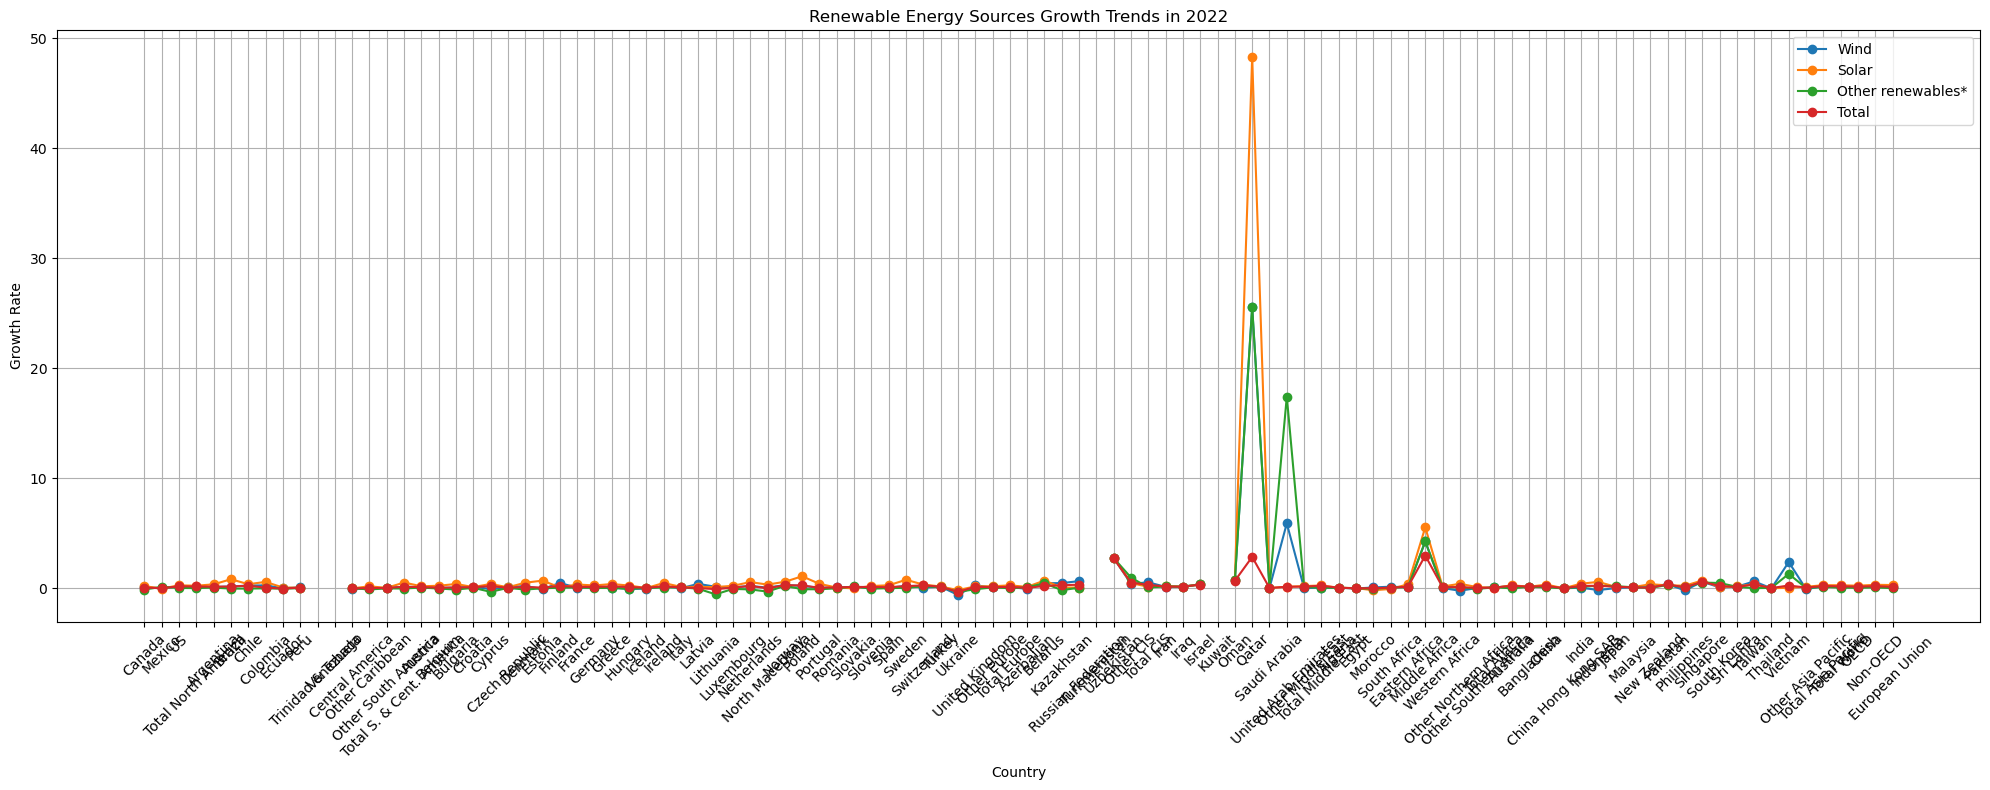

In [66]:
temp_gr2022_df = gr_2022_df.copy()
# Set the index to 'Energy Source' column
temp_gr2022_df.set_index('Energy Source', inplace=True)

# Plotting the growth trends for renewable energy sources
plt.figure(figsize=(20, 8))

renewable_sources = temp_gr2022_df.index

for source in renewable_sources:
    plt.plot(temp_gr2022_df.columns[1:], temp_gr2022_df.loc[source][1:], marker='o', label=source)

plt.xlabel('Country')
plt.ylabel('Growth Rate')
plt.title('Renewable Energy Sources Growth Trends in 2022')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**Investigate factors that might influence the growth of renewable energy, such as
government policies, technological advancements, or economic factors.**

The growth of renewable energy is influenced by a complex interplay of various factors, including government policies, technological advancements, and economic considerations. Here's a closer look at each of these factors:

1. **Government Policies and Regulations:**
   - **Renewable Energy Targets and Mandates:** Governments often set targets for the percentage of energy that should come from renewable sources. These targets can provide a clear signal to the industry and investors, driving growth in the sector.
   - **Feed-in Tariffs and Incentives:** Governments may offer financial incentives such as feed-in tariffs, tax credits, or subsidies to promote the use of renewable energy sources.
   - **Net Metering:** Net metering policies allow individuals or businesses to sell excess energy generated from renewables back to the grid, making investments in renewable energy systems more economically viable.
   - **Renewable Portfolio Standards (RPS):** These standards require utilities to generate a certain percentage of their electricity from renewable sources. RPS policies create a steady demand for renewable energy projects.
   - **Green Procurement:** Government agencies and corporations purchasing renewable energy contribute to demand, encouraging more investment in renewable projects.

2. **Technological Advancements:**
   - **Cost Reductions:** Advances in technology have led to significant cost reductions in renewable energy systems, particularly solar and wind. This has made renewable energy more competitive with traditional fossil fuels.
   - **Energy Storage:** Improvements in energy storage technologies (such as batteries) enable the efficient use of renewable energy even when the sun isn't shining or the wind isn't blowing.
   - **Efficiency Improvements:** Ongoing research and development enhance the efficiency of renewable energy systems, increasing their energy output and economic viability.

3. **Economic Factors:**
   - **Return on Investment:** As the costs of renewable energy technologies decrease and efficiency increases, the return on investment for renewable energy projects becomes more attractive.
   - **Job Creation:** The renewable energy sector creates jobs in manufacturing, installation, operation, and maintenance of renewable energy systems.
   - **Energy Security:** Diversifying energy sources to include renewables reduces dependence on imported fossil fuels, enhancing energy security.

4. **Environmental Awareness and Public Support:**
   - **Climate Change Concerns:** Growing awareness of the environmental impacts of fossil fuels and climate change drives public support for cleaner energy sources.
   - **Social Acceptance:** Local communities and stakeholders may support renewable projects due to their lower environmental footprint compared to fossil fuels.

5. **Access to Financing and Investment:**
   - **Investor Interest:** Renewable energy projects are increasingly attractive to investors seeking environmentally sustainable and socially responsible investments.
   - **Access to Capital:** Government-backed loans, private investments, and public-private partnerships provide necessary capital for renewable energy projects.

6. **Infrastructure Development:**
   - **Grid Modernization:** Upgrading and modernizing the electricity grid is essential for accommodating the integration of intermittent renewable energy sources.
   - **Infrastructure Investment:** Investment in transmission lines and energy storage infrastructure helps optimize the use of renewable energy.

It's important to note that the relative influence of these factors can vary depending on the specific region, country, or market conditions. A combination of these factors working together often leads to the accelerated growth of renewable energy sources.